In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Conv2D, Flatten, Reshape, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

import data_processing
import feature_extraction

In [48]:
df = data_processing.read_all_users('geolife_trajectories')
df = data_processing.process_classes(df)
df = data_processing.drop_unlabelled(df)

[1/182] processing user 135
[2/182] processing user 132
[3/182] processing user 104
[4/182] processing user 103
[5/182] processing user 168
[6/182] processing user 157
[7/182] processing user 150
[8/182] processing user 159
[9/182] processing user 166
[10/182] processing user 161
[11/182] processing user 102
[12/182] processing user 105
[13/182] processing user 133
[14/182] processing user 134
[15/182] processing user 160
[16/182] processing user 158
[17/182] processing user 167
[18/182] processing user 151
[19/182] processing user 169
[20/182] processing user 156
[21/182] processing user 024
[22/182] processing user 023
[23/182] processing user 015
[24/182] processing user 012
[25/182] processing user 079
[26/182] processing user 046
[27/182] processing user 041
[28/182] processing user 048
[29/182] processing user 077
[30/182] processing user 083
[31/182] processing user 084
[32/182] processing user 070
[33/182] processing user 013
[34/182] processing user 014
[35/182] processing use

In [49]:
df = data_processing.create_segments(df)

In [50]:
#df = data_processing.read_all_users('Geolife_data')
df = data_processing.calculations(df)

In [6]:
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,0.000113,101.0,-8.038106e-06,119.216746,29.987477,7.198863,-0.296906,-0.009056
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,0.000177,105.0,6.118362e-07,184.382087,65.165341,0.362918,0.620622,0.008738
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,0.001076,23.0,3.909546e-05,193.267409,8.885322,0.835518,0.386318,-0.010187
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,0.000126,105.0,-9.045108e-06,167.650102,25.617307,7.509185,-0.243974,-0.006003
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,0.000137,83.0,-8.016129e-05,240.783546,166.621353,48.482432,2.007486,0.248020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,19001,0.000994,0.000199,5.0,-1.346552e-05,89.999996,16.175060,0.338707,3.235012,-0.347141
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,19001,0.001291,0.000258,5.0,1.189351e-05,81.748068,8.251929,0.230275,-1.650386,-0.977080
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,19001,0.001873,0.000375,5.0,2.326641e-05,332.943923,251.195856,0.310568,50.239171,10.377911
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,19001,0.001479,0.000296,5.0,-1.576277e-05,331.310690,1.633234,0.266475,-0.326647,-10.113164


In [51]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,0.000113,101.0,-8.038106e-06,119.216746,29.987477,7.198863,-0.296906,-0.009056
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,0.000177,105.0,6.118362e-07,184.382087,65.165341,0.362918,0.620622,0.008738
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,0.001076,23.0,3.909546e-05,193.267409,8.885322,0.835518,0.386318,-0.010187
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,0.000126,105.0,-9.045108e-06,167.650102,25.617307,7.509185,-0.243974,-0.006003
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,0.000137,83.0,-8.016129e-05,240.783546,166.621353,48.482432,2.007486,0.248020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,19001,0.000994,0.000199,5.0,-1.346552e-05,89.999996,16.175060,0.338707,3.235012,-0.347141
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,19001,0.001291,0.000258,5.0,1.189351e-05,81.748068,8.251929,0.230275,-1.650386,-0.977080
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,19001,0.001873,0.000375,5.0,2.326641e-05,332.943923,251.195856,0.310568,50.239171,10.377911
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,19001,0.001479,0.000296,5.0,-1.576277e-05,331.310690,1.633234,0.266475,-0.326647,-10.113164


In [52]:
# Add a unique index column to the DataFrame
df['unique_index'] = range(1, len(df) + 1)

# Display the DataFrame to verify
df.head()

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,unique_index
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,0.000113,101.0,-8.038106e-06,119.216746,29.987477,7.198863,-0.296906,-0.009056,1
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,0.000177,105.0,6.118362e-07,184.382087,65.165341,0.362918,0.620622,0.008738,2
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,0.001076,23.0,3.909546e-05,193.267409,8.885322,0.835518,0.386318,-0.010187,3
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,0.000126,105.0,-9.045108e-06,167.650102,25.617307,7.509185,-0.243974,-0.006003,4
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,0.000137,83.0,-8.016129e-05,240.783546,166.621353,48.482432,2.007486,0.248020,5


In [53]:
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,unique_index
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,0.000113,101.0,-8.038106e-06,119.216746,29.987477,7.198863,-0.296906,-0.009056,1
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,0.000177,105.0,6.118362e-07,184.382087,65.165341,0.362918,0.620622,0.008738,2
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,0.001076,23.0,3.909546e-05,193.267409,8.885322,0.835518,0.386318,-0.010187,3
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,0.000126,105.0,-9.045108e-06,167.650102,25.617307,7.509185,-0.243974,-0.006003,4
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,0.000137,83.0,-8.016129e-05,240.783546,166.621353,48.482432,2.007486,0.248020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,19001,0.000994,0.000199,5.0,-1.346552e-05,89.999996,16.175060,0.338707,3.235012,-0.347141,4185238
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,19001,0.001291,0.000258,5.0,1.189351e-05,81.748068,8.251929,0.230275,-1.650386,-0.977080,4185239
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,19001,0.001873,0.000375,5.0,2.326641e-05,332.943923,251.195856,0.310568,50.239171,10.377911,4185240
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,19001,0.001479,0.000296,5.0,-1.576277e-05,331.310690,1.633234,0.266475,-0.326647,-10.113164,4185241


In [54]:
# Save the first 10,000 data points to a CSV file
df.head(10000).to_csv('HIER.csv', index=False)

Plot features over time

In [55]:
df = df.sort_values(by=['segment', 'time'])


In [15]:
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,unique_index
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,0.000113,101.0,-8.038106e-06,119.216746,29.987477,7.198863,-0.296906,-0.009056,1
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,0.000177,105.0,6.118362e-07,184.382087,65.165341,0.362918,0.620622,0.008738,2
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,0.001076,23.0,3.909546e-05,193.267409,8.885322,0.835518,0.386318,-0.010187,3
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,0.000126,105.0,-9.045108e-06,167.650102,25.617307,7.509185,-0.243974,-0.006003,4
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,0.000137,83.0,-8.016129e-05,240.783546,166.621353,48.482432,2.007486,0.248020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,19001,0.000994,0.000199,5.0,-1.346552e-05,89.999996,16.175060,0.338707,3.235012,-0.347141,4185238
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,19001,0.001291,0.000258,5.0,1.189351e-05,81.748068,8.251929,0.230275,-1.650386,-0.977080,4185239
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,19001,0.001873,0.000375,5.0,2.326641e-05,332.943923,251.195856,0.310568,50.239171,10.377911,4185240
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,19001,0.001479,0.000296,5.0,-1.576277e-05,331.310690,1.633234,0.266475,-0.326647,-10.113164,4185241


bike

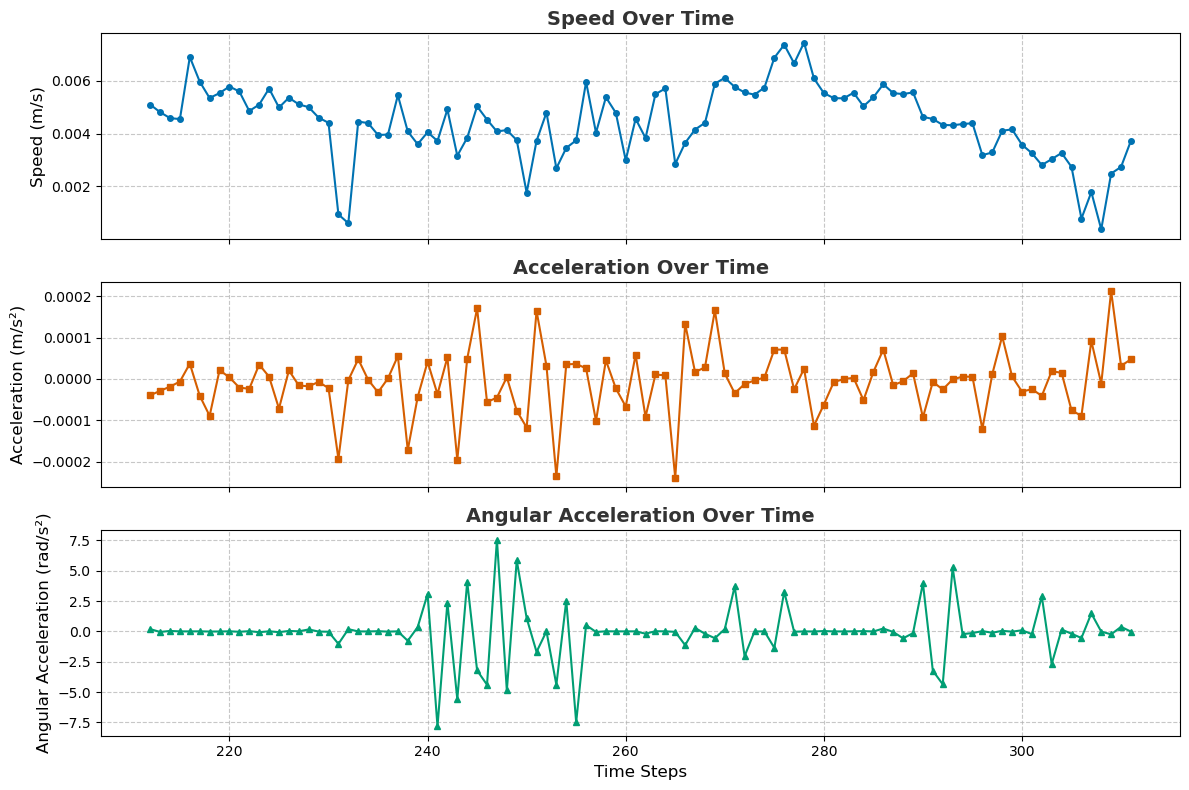

In [46]:
import matplotlib.pyplot as plt



# Select first 100 data points
subset = df[900:1000]

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)


# Plot Speed
axes[0].plot(subset.index, subset['speed'], marker='o', linestyle='-', color='#0072B2', markersize=4, linewidth=1.5)
axes[0].set_ylabel('Speed (m/s)', fontsize=12)
axes[0].set_title('Speed Over Time', fontsize=14, fontweight='bold', color='#333333')


# Plot Acceleration
axes[1].plot(subset.index, subset['acceleration'], marker='s', linestyle='-', color='#D55E00', markersize=4, linewidth=1.5)
axes[1].set_ylabel('Acceleration (m/s²)', fontsize=12)
axes[1].set_title('Acceleration Over Time', fontsize=14, fontweight='bold', color='#333333')

# Plot Angular Acceleration
axes[2].plot(subset.index, subset['angular_acceleration'], marker='^', linestyle='-', color='#009E73', markersize=4, linewidth=1.5)
axes[2].set_ylabel('Angular Acceleration (rad/s²)', fontsize=12)
axes[2].set_xlabel('Time Steps', fontsize=12)
axes[2].set_title('Angular Acceleration Over Time', fontsize=14, fontweight='bold', color='#333333')

# Improve layout and show grid
for ax in axes:
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.tick_params(axis='both', labelsize=10)

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()


In [34]:
df.index

Index([  3,   4,   5,   6,  10,  11,  12,  13,  14,  15,
       ...
       340, 341, 342, 344, 345, 346, 347, 348, 349, 350],
      dtype='int64', length=4185242)

car

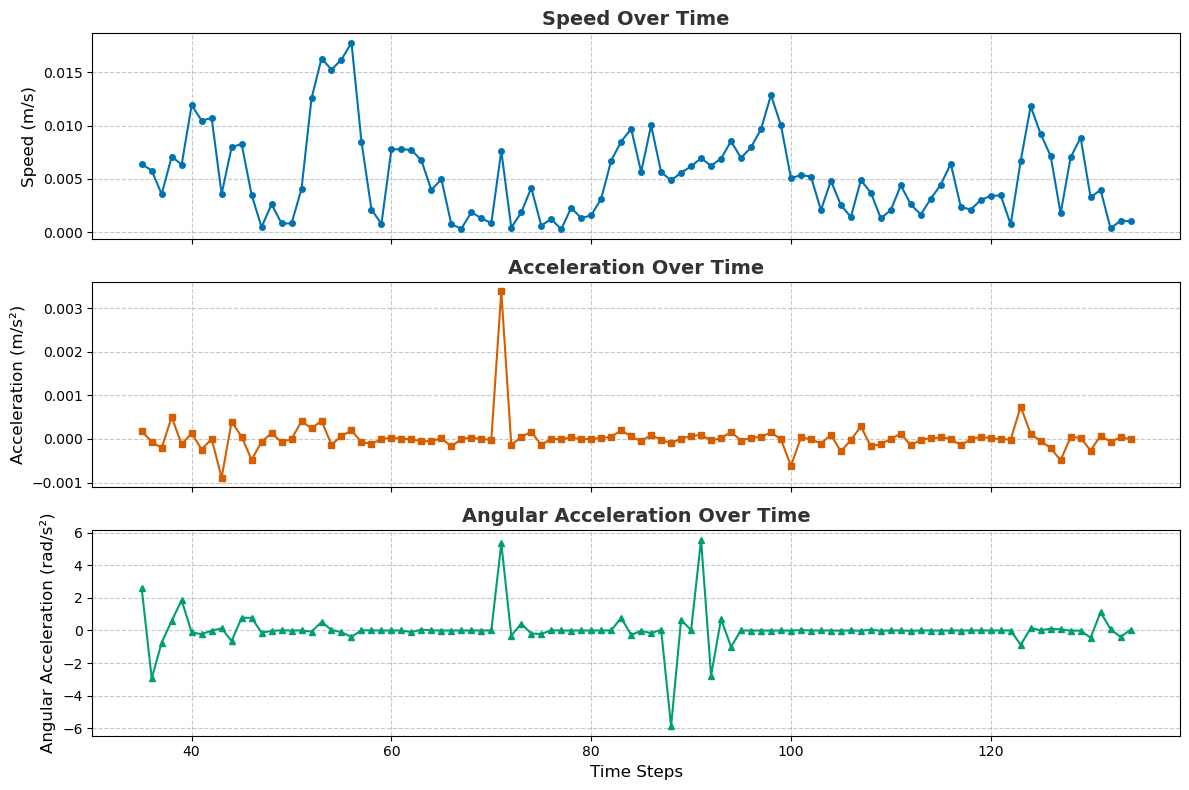

In [43]:

# Select first 100 data points
subset = df.iloc[3150:3250]

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot Speed
axes[0].plot(subset.index, subset['speed'], marker='o', linestyle='-', color='#0072B2', markersize=4, linewidth=1.5)
axes[0].set_ylabel('Speed (m/s)', fontsize=12)
axes[0].set_title('Speed Over Time', fontsize=14, fontweight='bold', color='#333333')

# Plot Acceleration
axes[1].plot(subset.index, subset['acceleration'], marker='s', linestyle='-', color='#D55E00', markersize=4, linewidth=1.5)
axes[1].set_ylabel('Acceleration (m/s²)', fontsize=12)
axes[1].set_title('Acceleration Over Time', fontsize=14, fontweight='bold', color='#333333')


# Plot Angular Acceleration
axes[2].plot(subset.index, subset['angular_acceleration'], marker='^', linestyle='-', color='#009E73', markersize=4, linewidth=1.5)
axes[2].set_ylabel('Angular Acceleration (rad/s²)', fontsize=12)
axes[2].set_xlabel('Time Steps', fontsize=12)
axes[2].set_title('Angular Acceleration Over Time', fontsize=14, fontweight='bold', color='#333333')

# Improve layout and show grid
for ax in axes:
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.tick_params(axis='both', labelsize=10)

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

In [8]:
df

,lat,lon,alt,elapsed time,time,trajectory,label,user
0,39.974294,116.399741,492.000000,39816.056644,2009-01-03 01:21:34,20090103012134.plt,0,135
1,39.974292,116.399592,492.000000,39816.056655,2009-01-03 01:21:35,20090103012134.plt,0,135
2,39.974309,116.399523,492.000000,39816.056667,2009-01-03 01:21:36,20090103012134.plt,0,135
3,39.974320,116.399588,492.000000,39816.056690,2009-01-03 01:21:38,20090103012134.plt,0,135
4,39.974365,116.399730,491.000000,39816.056701,2009-01-03 01:21:39,20090103012134.plt,0,135
...,...,...,...,...,...,...,...,...
28,39.973817,116.324117,265.748031,39286.418252,2007-07-23 10:02:17,20070723033153.plt,0,171
29,39.973333,116.323683,265.748031,39286.419028,2007-07-23 10:03:24,20070723033153.plt,0,171
30,39.973733,116.323250,364.173228,39286.419421,2007-07-23 10:03:58,20070723033153.plt,0,171
31,39.973317,116.322967,246.062992,39286.420243,2007-07-23 10:05:09,20070723033153.plt,0,171


Select features for time-series analysis

In [56]:
time_series_features = ['speed', 'acceleration', 'angular_acceleration']

Normalize Time-Series features -> normalize ich alles oder nur X?

In [57]:
scaler = StandardScaler()
df[time_series_features] = scaler.fit_transform(df[time_series_features])
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,unique_index
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,-0.762483,101.0,-0.010112,119.216746,29.987477,7.198863,-0.296906,-0.009701,1
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,-0.756048,105.0,-0.004894,184.382087,65.165341,0.362918,0.620622,-0.009423,2
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,-0.665980,23.0,0.018319,193.267409,8.885322,0.835518,0.386318,-0.009719,3
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,-0.761111,105.0,-0.010719,167.650102,25.617307,7.509185,-0.243974,-0.009654,4
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,-0.760033,83.0,-0.053617,240.783546,166.621353,48.482432,2.007486,-0.005684,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,19001,0.000994,-0.753868,5.0,-0.013386,89.999996,16.175060,0.338707,3.235012,-0.014985,4185238
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,19001,0.001291,-0.747912,5.0,0.001911,81.748068,8.251929,0.230275,-1.650386,-0.024829,4185239
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,19001,0.001873,-0.736259,5.0,0.008771,332.943923,251.195856,0.310568,50.239171,0.152623,4185240
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,19001,0.001479,-0.744154,5.0,-0.014771,331.310690,1.633234,0.266475,-0.326647,-0.167605,4185241


Encode Labels

In [58]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

Put into segments

In [59]:
df = data_processing.create_segments(df)
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,unique_index
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,0,163,1,0.011390,-0.762483,101.0,-0.010112,119.216746,29.987477,7.198863,-0.296906,-0.009701,1
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,0,163,1,0.018587,-0.756048,105.0,-0.004894,184.382087,65.165341,0.362918,0.620622,-0.009423,2
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,0,163,1,0.024753,-0.665980,23.0,0.018319,193.267409,8.885322,0.835518,0.386318,-0.009719,3
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,0,163,1,0.013280,-0.761111,105.0,-0.010719,167.650102,25.617307,7.509185,-0.243974,-0.009654,4
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,0,163,2,0.011390,-0.760033,83.0,-0.053617,240.783546,166.621353,48.482432,2.007486,-0.005684,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,4,102,9226,0.000994,-0.753868,5.0,-0.013386,89.999996,16.175060,0.338707,3.235012,-0.014985,4185238
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,4,102,9226,0.001291,-0.747912,5.0,0.001911,81.748068,8.251929,0.230275,-1.650386,-0.024829,4185239
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,4,102,9226,0.001873,-0.736259,5.0,0.008771,332.943923,251.195856,0.310568,50.239171,0.152623,4185240
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,4,102,9226,0.001479,-0.744154,5.0,-0.014771,331.310690,1.633234,0.266475,-0.326647,-0.167605,4185241


Group by trajectory to create sequence PROBLEM -> nicht jede trajectory hat das gleiche label!

In [60]:
X_sequences = []
y_sequences = []

for _, group in df.groupby('segment'):
    X_sequences.append(group[time_series_features].values)  # Raw sequences
    y_sequences.append(group['label'].iloc[0])  # Assign one label per segment

In [61]:
for i, seq in enumerate(X_sequences):
    print(f"Shape of sequence {i}: {seq.shape}")

Shape of sequence 0: (4, 3)
Shape of sequence 1: (44, 3)
Shape of sequence 2: (24, 3)
Shape of sequence 3: (38, 3)
Shape of sequence 4: (31, 3)
Shape of sequence 5: (44, 3)
Shape of sequence 6: (1, 3)
Shape of sequence 7: (21, 3)
Shape of sequence 8: (4, 3)
Shape of sequence 9: (26, 3)
Shape of sequence 10: (26, 3)
Shape of sequence 11: (15, 3)
Shape of sequence 12: (90, 3)
Shape of sequence 13: (73, 3)
Shape of sequence 14: (117, 3)
Shape of sequence 15: (20, 3)
Shape of sequence 16: (74, 3)
Shape of sequence 17: (15, 3)
Shape of sequence 18: (31, 3)
Shape of sequence 19: (41, 3)
Shape of sequence 20: (615, 3)
Shape of sequence 21: (805, 3)
Shape of sequence 22: (517, 3)
Shape of sequence 23: (20, 3)
Shape of sequence 24: (13, 3)
Shape of sequence 25: (7, 3)
Shape of sequence 26: (30, 3)
Shape of sequence 27: (22, 3)
Shape of sequence 28: (25, 3)
Shape of sequence 29: (58, 3)
Shape of sequence 30: (101, 3)
Shape of sequence 31: (3, 3)
Shape of sequence 32: (21, 3)
Shape of sequence 33

Plot the trajectory length

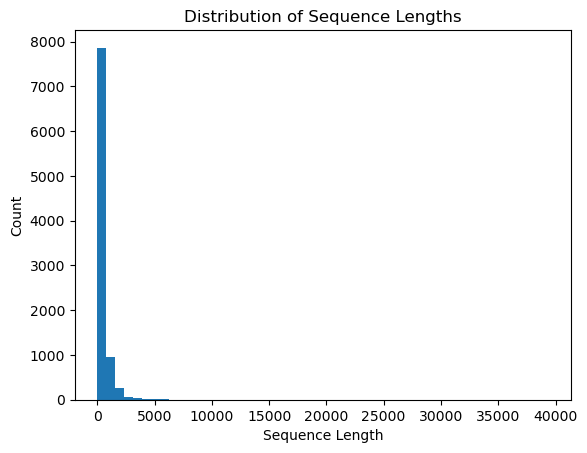

In [62]:
import matplotlib.pyplot as plt
import numpy as np

seq_lengths = [len(seq) for seq in X_sequences]
plt.hist(seq_lengths, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.show()

Neue Reihenfolge:

In [12]:
y_sequences

[0,
 4,
 0,
 0,
 2,
 4,
 2,
 2,
 2,
 4,
 1,
 4,
 1,
 4,
 4,
 1,
 0,
 3,
 4,
 4,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 4,
 0,
 2,
 4,
 1,
 4,
 4,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 4,
 2,
 2,
 0,
 2,
 1,
 4,
 1,
 4,
 0,
 2,
 2,
 4,
 3,
 4,
 0,
 0,
 0,
 2,
 4,
 1,
 4,
 1,
 4,
 4,
 3,
 0,
 4,
 2,
 3,
 4,
 2,
 0,
 2,
 4,
 3,
 1,
 4,
 4,
 0,
 2,
 3,
 4,
 4,
 4,
 2,
 0,
 2,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 4,
 2,
 0,
 2,
 2,
 2,
 4,
 1,
 4,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 4,
 2,
 4,
 1,
 4,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 1,
 4,
 2,
 4,
 1,
 4,
 2,
 4,
 2,
 4,
 1,
 4,
 1,
 2,
 2,
 4,
 1,
 4,
 1,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 4,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 2,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 0,
 2,
 4,
 4,
 1,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 2,
 0,
 4,
 2,
 4,
 0,
 2,
 0,
 0,
 2,
 2,
 4,
 2,
 0,
 2,
 2,
 2,
 1,
 4,
 4,
 1,
 2,
 0,
 4,
 2,
 4,
 0,
 2,
 0,
 4,
 2,


In [63]:
# Convert labels to one-hot encoding
y_sequences = to_categorical(y_sequences)
#X_sequences.shape()
y_sequences



array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [64]:
y_sequences

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

#print("Shape of X_train:", X_train.shape)  # (num_samples, time_steps, num_features)
#print("Shape of y_train:", y_train.shape)  # (num_samples, num_classes)

In [66]:
# Further split train into train & validation (keeping order intact)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [15]:
y_test

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

rolling winddow on training!

diese funktion nochmal genau anschauen was sie macht(wirklich das richtige??)

In [67]:
def create_rolling_windows(X_sequences, y_sequences, window_size=100, step=50):
    """
    Creates rolling window segments from time-series data, padding short sequences at the beginning.
    
    Parameters:
    - X_sequences: List of time-series feature sequences (NumPy arrays)
    - y_sequences: List of corresponding labels.
    - window_size: Number of time steps per window
    - step: Step size between windows (e.g., 10 for overlap)
    
    Returns:
    - X_windows: NumPy array of rolling window samples
    - y_windows: NumPy array of labels
    """
    X_windows = []
    y_windows = []

    for i in range(len(X_sequences)):  # Loop through sequences
        seq = X_sequences[i]  # Extract single trajectory
        label = y_sequences[i]  # Corresponding label

        # If sequence is shorter than window_size, pad at the beginning
        if len(seq) < window_size:
            pad_length = window_size - len(seq)
            pad = np.zeros((pad_length, seq.shape[1]))  # Create zero padding
            seq = np.vstack((seq, pad))  # Stack padding **after** existing data

            # Add the single padded sequence
            X_windows.append(seq)
            y_windows.append(label)
            continue  # Skip rolling window logic for this sequence

        # Create rolling windows within the sequence
        for j in range(0, len(seq) - window_size + 1, step):
            X_windows.append(seq[j:j + window_size])  # Extract window
            y_windows.append(label)  # Use the same label for entire window

    return np.array(X_windows), np.array(y_windows)

In [68]:
# Set parameters
window_size = 100  # Length of each segment
step_size = 50  # Step between windows

# Create rolling windows
X_train, y_train = create_rolling_windows(X_train, y_train, window_size, step_size)

# Verify shape
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (55589, 100, 3)
Shape of y_train: (55589, 5)


Also apply on the test data!

In [69]:
# Create rolling windows
X_test, y_test = create_rolling_windows(X_test, y_test, window_size, step_size)

# Verify shape
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (13745, 100, 3)
Shape of y_test: (13745, 5)


Also apply on the validation data!

In [70]:
# Create rolling windows
X_val, y_val = create_rolling_windows(X_val, y_val, window_size, step_size)

# Verify shape
print("Shape of X_val", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_val (5529, 100, 3)
Shape of y_val: (5529, 5)


In [71]:
# Apply padding
X_train_padded = pad_sequences(X_train, 
                         maxlen=window_size, 
                         padding='post', 
                         dtype='float32')

# Verify shape
print("Final Shape of X_train_padded:", X_train.shape)

Final Shape of X_train_padded: (55589, 100, 3)


In [72]:
# Apply padding
X_test_padded = pad_sequences(X_test, 
                         maxlen=window_size, 
                         padding='post', 
                         dtype='float32')

# Verify shape
print("Final Shape of X_test_padded:", X_test.shape)

Final Shape of X_test_padded: (13745, 100, 3)


In [73]:
# Apply padding
X_val_padded = pad_sequences(X_val, 
                         maxlen=window_size, 
                         padding='post', 
                         dtype='float32')

# Verify shape
print("Final Shape of X_val_padded:", X_val.shape)

Final Shape of X_val_padded: (5529, 100, 3)


In [21]:
print(X_test_padded is X_test)

False


## STOP

Set max lenght because of imbalances trajectory lengths

Create Rolling Window

In [23]:


def create_rolling_windows(X_sequences, y_sequences, window_size=200, step=50):
    """
    Creates rolling window segments from time-series data.
    
    Parameters:
    - X_sequences: List of time-series feature sequences (NumPy arrays)
    - y_sequences: List of corresponding labels
    - window_size: Number of time steps per window
    - step: Step size between windows (e.g., 10 for overlap)
    
    Returns:
    - X_windows: NumPy array of rolling window samples
    - y_windows: NumPy array of labels
    """
    X_windows = []
    y_windows = []

    for i in range(len(X_sequences)):  # Loop through trajectories
        seq = X_sequences[i]  # Extract single trajectory
        label = y_sequences[i]  # Corresponding label
        
        # Create rolling windows within the trajectory
        for j in range(0, len(seq) - window_size + 1, step):
            X_windows.append(seq[j:j + window_size])  # Extract window
            y_windows.append(label)  # Use the same label for entire window

    return np.array(X_windows), np.array(y_windows)


In [24]:
# Set parameters
window_size = 200  # Length of each segment
step_size = 50  # Step between windows

# Create rolling windows
X_windows, y_windows = create_rolling_windows(X_sequences, y_sequences, window_size, step_size)

# Convert labels to one-hot encoding
y_onehot_seq = to_categorical(y_windows)

# Verify shape
print("Shape of X_windows:", X_windows.shape)
print("Shape of y_onehot_seq:", y_onehot_seq.shape)

Shape of X_windows: (65814, 200, 3)
Shape of y_onehot_seq: (65814, 5, 2)


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Apply padding
X_padded = pad_sequences(X_windows, 
                         maxlen=window_size, 
                         padding='post', 
                         dtype='float32')

# Verify shape
print("Final Shape of X_padded:", X_padded.shape)


Final Shape of X_padded: (63207, 200, 3)


Set up the model

In [74]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()

    # Masking layer to ignore padded values
    #model.add(Masking(mask_value=0.0, input_shape=input_shape))

    # LSTM Layers
    model.add(LSTM(128, activation='tanh', return_sequences=True))
    model.add(Dropout(0.3))
    
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.3))

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Initialize the model

In [75]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
1738/1738 ━━━━━━━━━━━━━━━━━━━━ 150s 86ms/step - accuracy: 0.5383 - loss: 1.1566 - val_accuracy: 0.6543 - val_loss: 0.9407
Epoch 2/30
1738/1738 ━━━━━━━━━━━━━━━━━━━━ 141s 81ms/step - accuracy: 0.6776 - loss: 0.9168 - val_accuracy: 0.7256 - val_loss: 0.8043
Epoch 3/30
1738/1738 ━━━━━━━━━━━━━━━━━━━━ 144s 83ms/step - accuracy: 0.7539 - loss: 0.7605 - val_accuracy: 0.7652 - val_loss: 0.7030
Epoch 4/30
1738/1738 ━━━━━━━━━━━━━━━━━━━━ 144s 83ms/step - accuracy: 0.7847 - loss: 0.6804 - val_accuracy: 0.7841 - val_loss: 0.6545
Epoch 5/30
1738/1738 ━━━━━━━━━━━━━━━━━━━━ 146s 84ms/step - accuracy: 0.7515 - loss: 0.7296 - val_accuracy: 0.7906 - val_loss: 0.6670
Epoch 6/30
1738/1738 ━━━━━━━━━━━━━━━━━━━━ 138s 80ms/step - accuracy: 0.7980 - loss: 0.6387 - val_accuracy: 0.8013 - val_loss: 0.6173
Epoch 7/30
1738/1738 ━━━━━━━━━━━━━━━━━━━━ 137s 79ms/step - accuracy: 0.7818 - loss: 0.6730 - val_accuracy: 0.7961 - val_loss: 0.6161
Epoch 8/30
1738/1738 ━━━━━━━━━━━━━━━━━━━━ 130s 75ms/step - accuracy: 

KeyboardInterrupt: 

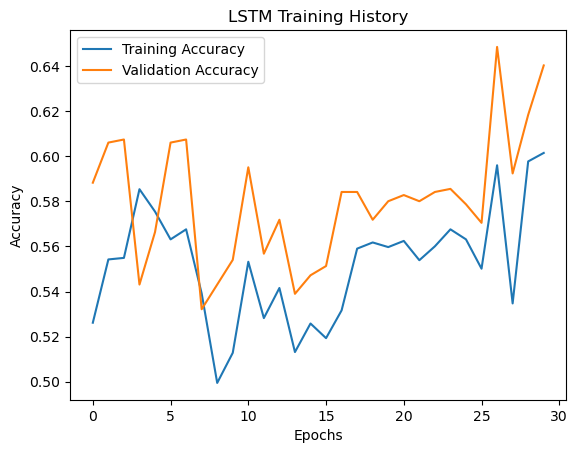

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50       144
           1       1.00      0.01      0.02        84
           2       0.55      0.87      0.67       125
           3       0.00      0.00      0.00        41
           4       0.69      0.88      0.77       337

    accuracy                           0.64       731
   macro avg       0.57      0.44      0.39       731
weighted avg       0.65      0.64      0.57       731



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


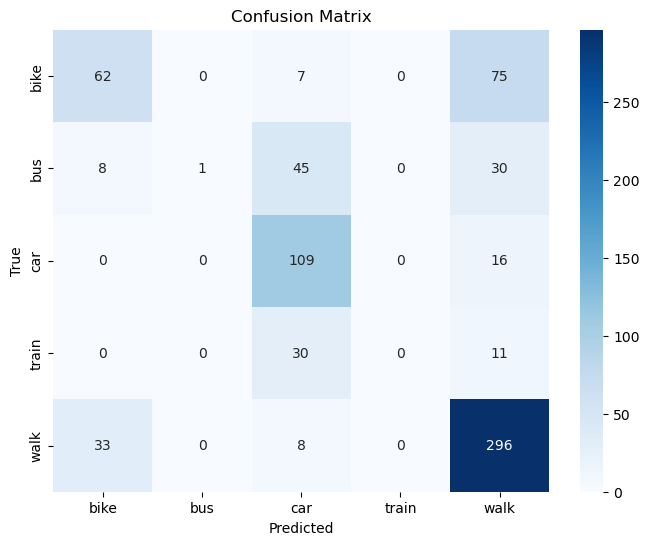

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Model with Conv2D Layer. Diqe 100 variabel machen!

In [55]:
def create_lstm_model(input_shape, num_classes):
    # Define Model
    model = Sequential()

    # 2D Convolution Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(100, 3, 1)))

    # Flatten before LSTM
    model.add(Flatten())  # Converts 2D to 1D for LSTM compatibility

    # LSTM Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.15))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.15))

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 5-class classification

    # Compile the Model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [56]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 3, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,204,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214,981 (4.63 MB)

 Trainable params: 1,214,981 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[reduce_lr])

NameError: name 'model' is not defined

Plot

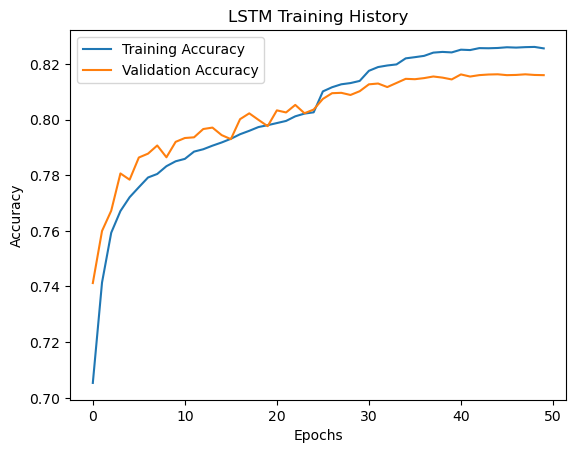

4453/4453 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86     23102
           1       0.79      0.74      0.76     36891
           2       0.72      0.66      0.69     20849
           3       0.91      0.89      0.90     27774
           4       0.77      0.93      0.84     33853

    accuracy                           0.81    142469
   macro avg       0.82      0.81      0.81    142469
weighted avg       0.82      0.81      0.81    142469



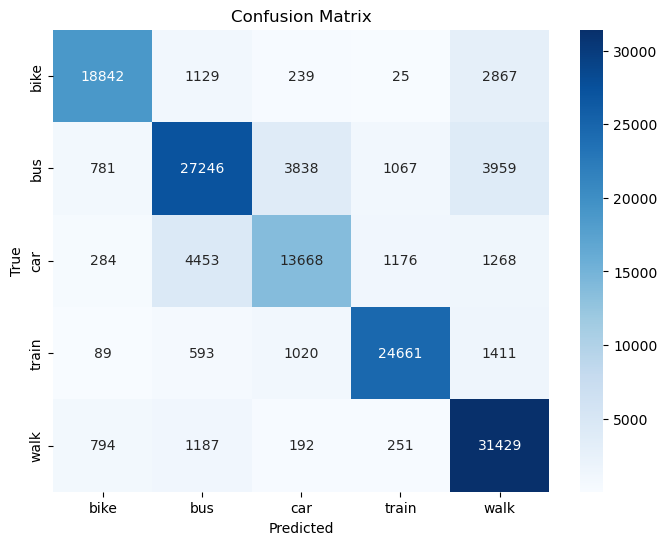

In [22]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="lstm_model_architecture.png", show_shapes=True, show_layer_names=True, dpi=300)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


/opt/anaconda3/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/opt/anaconda3/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/opt/anaconda3/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


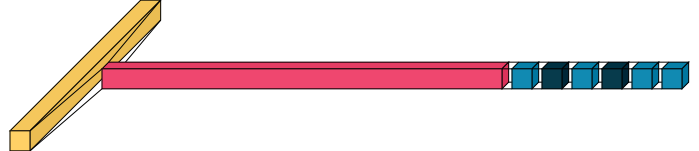

In [59]:
import visualkeras

model = model

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

# Less dropout

In [25]:
def create_lstm_model(input_shape, num_classes):
    # Define Model
    model = Sequential()

    # 2D Convolution Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(100, 3, 1)))

    # Flatten before LSTM
    model.add(Flatten())  # Converts 2D to 1D for LSTM compatibility

    # LSTM Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 5-class classification

    # Compile the Model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [26]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

IndexError: tuple index out of range

In [27]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model to best state
)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 92s 6ms/step - accuracy: 0.6786 - loss: 0.8937 - val_accuracy: 0.7392 - val_loss: 0.7514 - learning_rate: 0.0010
Epoch 2/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 109s 8ms/step - accuracy: 0.7484 - loss: 0.7438 - val_accuracy: 0.7723 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 3/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 89s 6ms/step - accuracy: 0.7693 - loss: 0.6869 - val_accuracy: 0.7855 - val_loss: 0.6437 - learning_rate: 0.0010
Epoch 4/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 0.7791 - loss: 0.6589 - val_accuracy: 0.7806 - val_loss: 0.6497 - learning_rate: 0.0010
Epoch 5/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 92s 6ms/step - accuracy: 0.7843 - loss: 0.6420 - val_accuracy: 0.7922 - val_loss: 0.6193 - learning_rate: 0.0010
Epoch 6/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 84s 6ms/step - accuracy: 0.7879 - loss: 0.6329 - val_accuracy: 0.7973 - val_loss: 0.6046 - learning_rate: 0.0010
Epoch 7/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 88s 6ms/step 

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#No dropout!

In [28]:
def create_lstm_model(input_shape, num_classes):
    # Define Model
    model = Sequential()

    # 2D Convolution Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(100, 3, 1)))

    # Flatten before LSTM
    model.add(Flatten())  # Converts 2D to 1D for LSTM compatibility

    # LSTM Layer
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.1))

    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.1))

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 5-class classification

    # Compile the Model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [29]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 3, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,204,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214,981 (4.63 MB)

 Trainable params: 1,214,981 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model to best state
)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - accuracy: 0.6914 - loss: 0.8550 - val_accuracy: 0.7662 - val_loss: 0.6871 - learning_rate: 0.0010
Epoch 2/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.7721 - loss: 0.6765 - val_accuracy: 0.7901 - val_loss: 0.6241 - learning_rate: 0.0010
Epoch 3/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.7917 - loss: 0.6227 - val_accuracy: 0.7996 - val_loss: 0.6013 - learning_rate: 0.0010
Epoch 4/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.8022 - loss: 0.5945 - val_accuracy: 0.8066 - val_loss: 0.5810 - learning_rate: 0.0010
Epoch 5/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.8081 - loss: 0.5776 - val_accuracy: 0.8080 - val_loss: 0.5744 - learning_rate: 0.0010
Epoch 6/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - accuracy: 0.8125 - loss: 0.5652 - val_accuracy: 0.8045 - val_loss: 0.5921 - learning_rate: 0.0010
Epoch 7/50
14247/14247 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step -

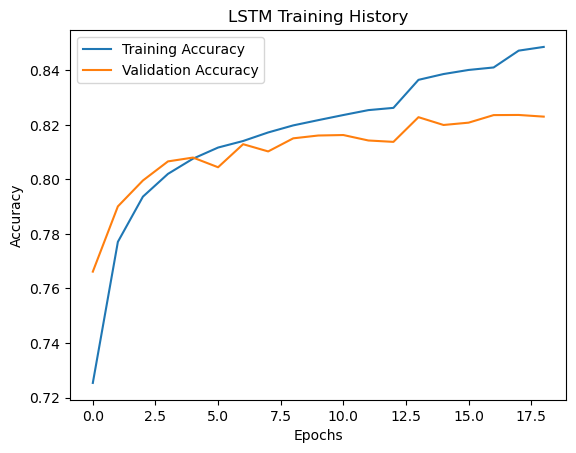

4453/4453 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86     23102
           1       0.80      0.75      0.77     36891
           2       0.76      0.69      0.72     20849
           3       0.92      0.90      0.91     27774
           4       0.76      0.93      0.84     33853

    accuracy                           0.82    142469
   macro avg       0.83      0.81      0.82    142469
weighted avg       0.83      0.82      0.82    142469



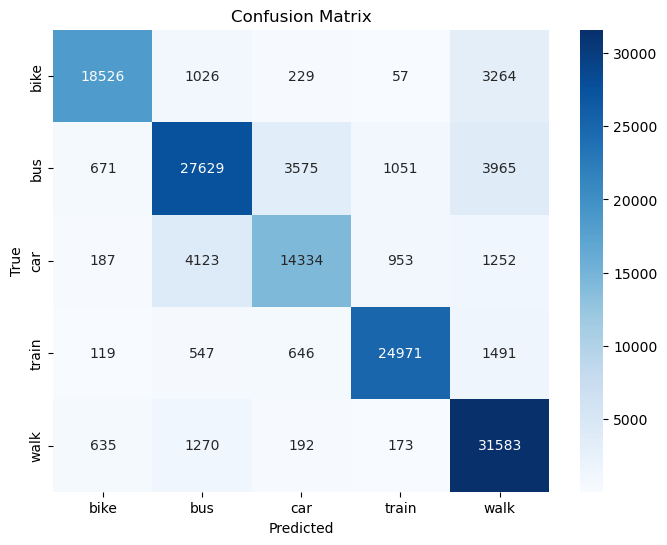

In [33]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Actually use LSTM!

In [77]:
from tensorflow.keras.layers import Conv2D, LSTM, Dense, Dropout, Reshape, Permute

In [78]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    # Use Conv1D for time-series feature extraction
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    
    # LSTM Layers
    model.add(LSTM(128, return_sequences=True))  # Retain temporal dimension
    model.add(Dropout(0.3))
    
    model.add(LSTM(64))  # Final LSTM layer returns output (no sequence)
    model.add(Dropout(0.3))
    
    # Dense Layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [79]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 98, 32)         │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 98, 128)        │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 98, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,565 (541.27 KB)

 Trainable params: 138,565 (541.27 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model to best state
)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 121s 86ms/step - accuracy: 0.5333 - loss: 1.1802 - val_accuracy: 0.4909 - val_loss: 1.1745 - learning_rate: 0.0010
Epoch 2/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 113s 81ms/step - accuracy: 0.5829 - loss: 1.0570 - val_accuracy: 0.6181 - val_loss: 1.0090 - learning_rate: 0.0010
Epoch 3/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 110s 79ms/step - accuracy: 0.6737 - loss: 0.9086 - val_accuracy: 0.7340 - val_loss: 0.7661 - learning_rate: 0.0010
Epoch 4/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 116s 83ms/step - accuracy: 0.7422 - loss: 0.7711 - val_accuracy: 0.7622 - val_loss: 0.7232 - learning_rate: 0.0010
Epoch 5/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 111s 80ms/step - accuracy: 0.7712 - loss: 0.7243 - val_accuracy: 0.7838 - val_loss: 0.6795 - learning_rate: 0.0010
Epoch 6/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 117s 84ms/step - accuracy: 0.7923 - loss: 0.6713 - val_accuracy: 0.8013 - val_loss: 0.6439 - learning_rate: 0.0010
Epoch 7/50
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 127s 91ms/step -

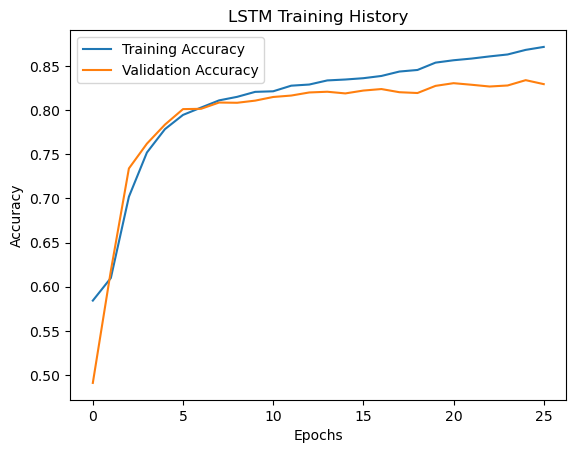

430/430 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      2212
           1       0.83      0.74      0.79      3800
           2       0.81      0.74      0.77      2204
           3       0.91      0.92      0.91      2280
           4       0.77      0.94      0.85      3249

    accuracy                           0.84     13745
   macro avg       0.85      0.84      0.84     13745
weighted avg       0.84      0.84      0.83     13745



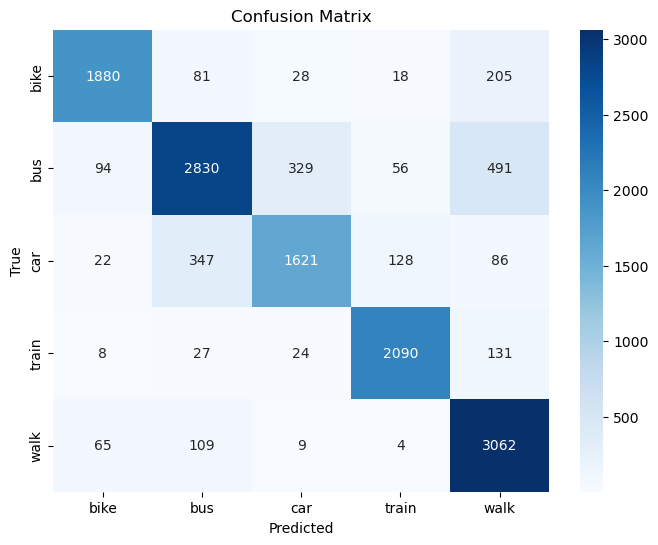

In [82]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

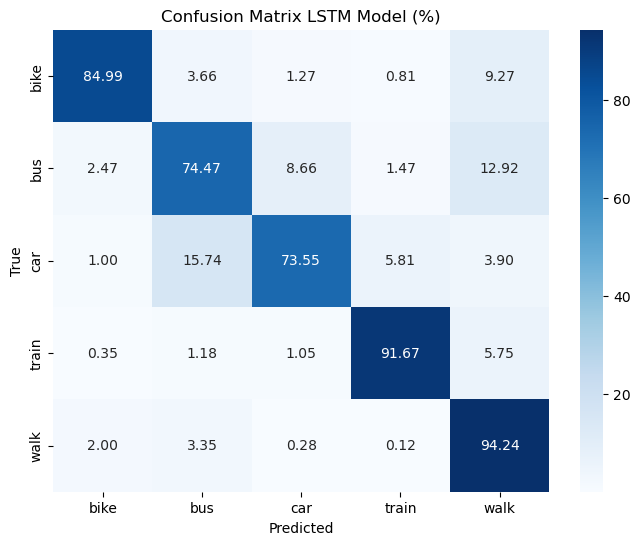

In [84]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Normalize the confusion matrix (row-wise)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentages

# Plot normalized confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix LSTM Model (%)")
plt.show()

(142469, 5)


ein lstm layer weniger!

In [24]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    # Use Conv1D for time-series feature extraction
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    
    # LSTM Layers
    
    model.add(LSTM(64))  # Final LSTM layer returns output (no sequence)
    model.add(Dropout(0.3))
    
    # Dense Layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [25]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model2 = create_lstm_model(input_shape, num_classes)

model2.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 198, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,557 (123.27 KB)

 Trainable params: 31,557 (123.27 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model to best state
)

# Train the model
history = model2.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 54s 42ms/step - accuracy: 0.4762 - loss: 1.2491 - val_accuracy: 0.5738 - val_loss: 1.0974 - learning_rate: 0.0010
Epoch 2/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.6250 - loss: 1.0033 - val_accuracy: 0.6044 - val_loss: 1.0781 - learning_rate: 0.0010
Epoch 3/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.5065 - loss: 1.2129 - val_accuracy: 0.5623 - val_loss: 1.0777 - learning_rate: 0.0010
Epoch 4/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.5514 - loss: 1.0957 - val_accuracy: 0.5825 - val_loss: 1.0647 - learning_rate: 0.0010
Epoch 5/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.5663 - loss: 1.0801 - val_accuracy: 0.5850 - val_loss: 1.0317 - learning_rate: 0.0010
Epoch 6/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.5815 - loss: 1.0753 - val_accuracy: 0.6713 - val_loss: 0.9075 - learning_rate: 0.0010
Epoch 7/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accura

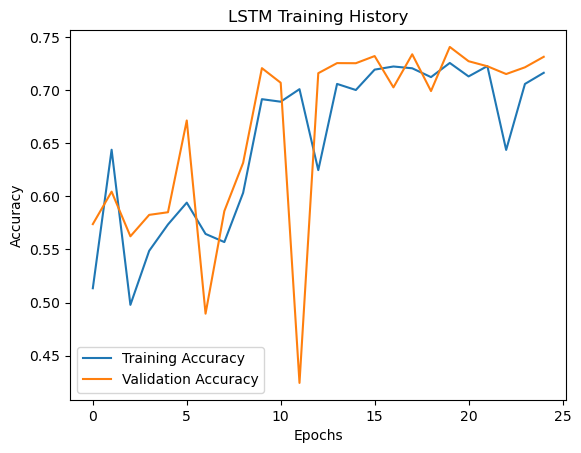

396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      2065
           1       0.73      0.72      0.72      3210
           2       0.51      0.38      0.43      1806
           3       0.75      0.81      0.78      2707
           4       0.76      0.90      0.82      2854

    accuracy                           0.73     12642
   macro avg       0.72      0.71      0.71     12642
weighted avg       0.73      0.73      0.73     12642



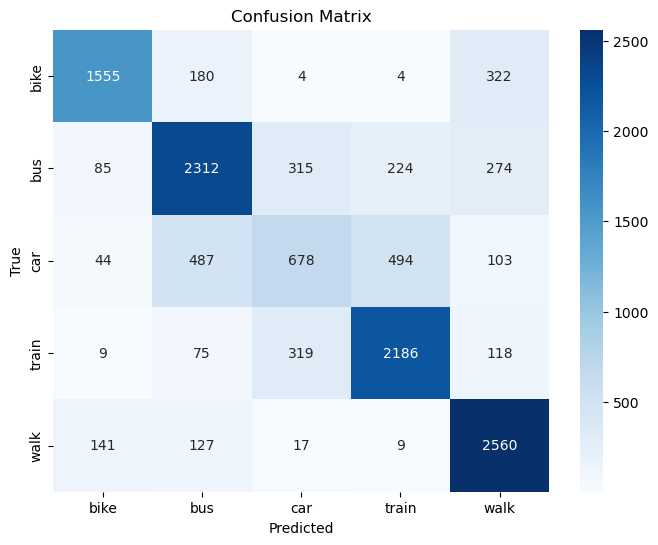

In [27]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [20]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    # Use Conv1D for time-series feature extraction
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    
    # LSTM Layers
    model.add(LSTM(128, return_sequences=True))  # Retain temporal dimension
    model.add(Dropout(0.3))
    
    model.add(LSTM(64))  # Final LSTM layer returns output (no sequence)
    model.add(Dropout(0.3))
    
    # Dense Layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [21]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model = create_lstm_model(input_shape, num_classes)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 98, 32)         │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 98, 128)        │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,565 (541.27 KB)

 Trainable params: 138,565 (541.27 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model to best state
)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 159s 87ms/step - accuracy: 0.5297 - loss: 1.1605 - val_accuracy: 0.7308 - val_loss: 0.7973 - learning_rate: 0.0010
Epoch 2/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 147s 81ms/step - accuracy: 0.6713 - loss: 0.9236 - val_accuracy: 0.7937 - val_loss: 0.6662 - learning_rate: 0.0010
Epoch 3/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 146s 81ms/step - accuracy: 0.7402 - loss: 0.7725 - val_accuracy: 0.8241 - val_loss: 0.5813 - learning_rate: 0.0010
Epoch 4/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 150s 83ms/step - accuracy: 0.7734 - loss: 0.7080 - val_accuracy: 0.8550 - val_loss: 0.5545 - learning_rate: 0.0010
Epoch 5/50
1376/1807 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.7827 - loss: 0.6719

KeyboardInterrupt: 

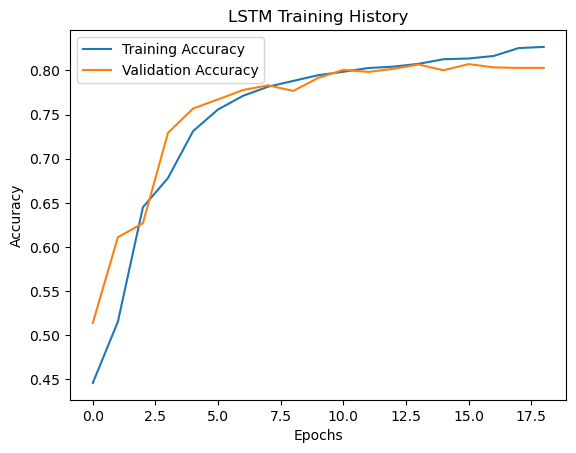

492/492 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      2461
           1       0.81      0.74      0.77      3884
           2       0.70      0.67      0.69      1974
           3       0.93      0.89      0.91      3709
           4       0.78      0.93      0.85      3715

    accuracy                           0.83     15743
   macro avg       0.83      0.82      0.82     15743
weighted avg       0.83      0.83      0.83     15743



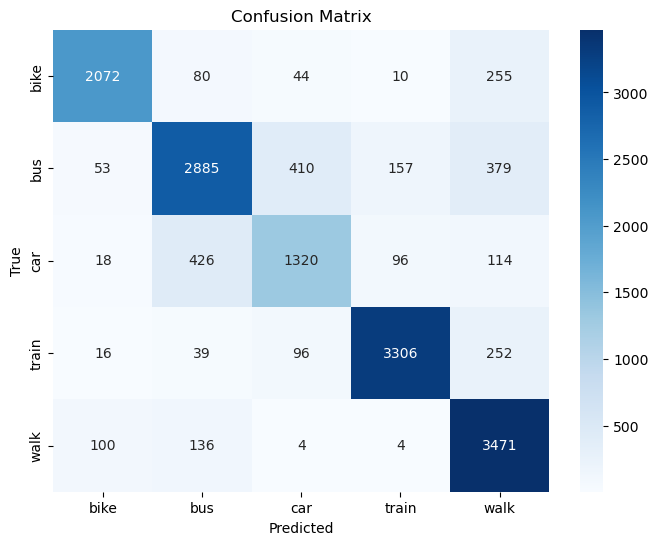

In [32]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Das gleiche ohne Padding

In [24]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model to best state
)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 158s 93ms/step - accuracy: 0.8418 - loss: 0.4996 - val_accuracy: 0.8064 - val_loss: 0.6032 - learning_rate: 2.5000e-04
Epoch 2/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 150s 89ms/step - accuracy: 0.8454 - loss: 0.4942 - val_accuracy: 0.8111 - val_loss: 0.5937 - learning_rate: 2.5000e-04
Epoch 3/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 136s 81ms/step - accuracy: 0.8479 - loss: 0.4858 - val_accuracy: 0.8122 - val_loss: 0.5964 - learning_rate: 2.5000e-04
Epoch 4/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 145s 86ms/step - accuracy: 0.8483 - loss: 0.4806 - val_accuracy: 0.8079 - val_loss: 0.6058 - learning_rate: 2.5000e-04
Epoch 5/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 148s 88ms/step - accuracy: 0.8512 - loss: 0.4747 - val_accuracy: 0.8080 - val_loss: 0.6106 - learning_rate: 2.5000e-04
Epoch 6/50
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 146s 87ms/step - accuracy: 0.8518 - loss: 0.4705 - val_accuracy: 0.8083 - val_loss: 0.6117 - learning_rate: 1.2500e-04
Epoch 7/50
1223/1687 ━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Architecture from Phased

In [25]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    # Use Conv1D for time-series feature extraction
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    
    # LSTM Layers
    model.add(LSTM(512))  # Retain temporal dimension
    model.add(Dropout(0.3))

    
    # Dense Layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [26]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = y_train.shape[1]
model2 = create_lstm_model(input_shape, num_classes)

model2.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 98, 32)         │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 512)            │     1,116,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291,205 (4.93 MB)

 Trainable params: 1,291,205 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model to best state
)

# Train the model
history = model2.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 300s 222ms/step - accuracy: 0.4006 - loss: 1.3701 - val_accuracy: 0.5524 - val_loss: 1.1368 - learning_rate: 0.0010
Epoch 2/50
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 302s 224ms/step - accuracy: 0.5458 - loss: 1.1252 - val_accuracy: 0.6830 - val_loss: 0.9524 - learning_rate: 0.0010
Epoch 3/50
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 305s 226ms/step - accuracy: 0.6321 - loss: 0.9933 - val_accuracy: 0.7124 - val_loss: 0.8810 - learning_rate: 0.0010
Epoch 4/50
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 335s 248ms/step - accuracy: 0.7135 - loss: 0.8528 - val_accuracy: 0.7454 - val_loss: 0.7879 - learning_rate: 0.0010
Epoch 5/50
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 351s 260ms/step - accuracy: 0.7474 - loss: 0.7752 - val_accuracy: 0.7642 - val_loss: 0.7614 - learning_rate: 0.0010
Epoch 6/50
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 382s 283ms/step - accuracy: 0.7601 - loss: 0.7435 - val_accuracy: 0.7701 - val_loss: 0.7449 - learning_rate: 0.0010
Epoch 7/50
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 435s 322ms

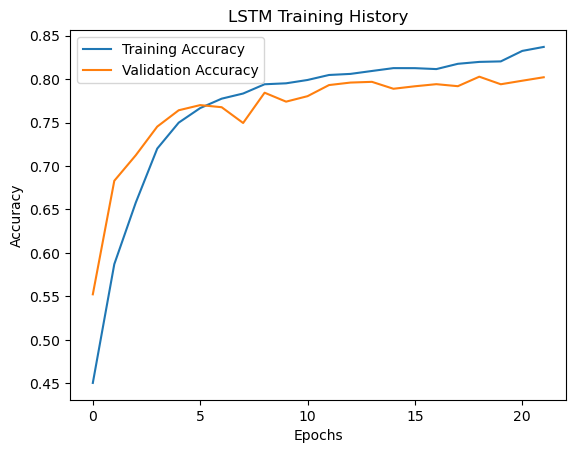

492/492 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      2461
           1       0.82      0.75      0.78      3884
           2       0.70      0.75      0.72      1974
           3       0.95      0.88      0.91      3709
           4       0.80      0.92      0.85      3715

    accuracy                           0.84     15743
   macro avg       0.83      0.83      0.83     15743
weighted avg       0.84      0.84      0.84     15743



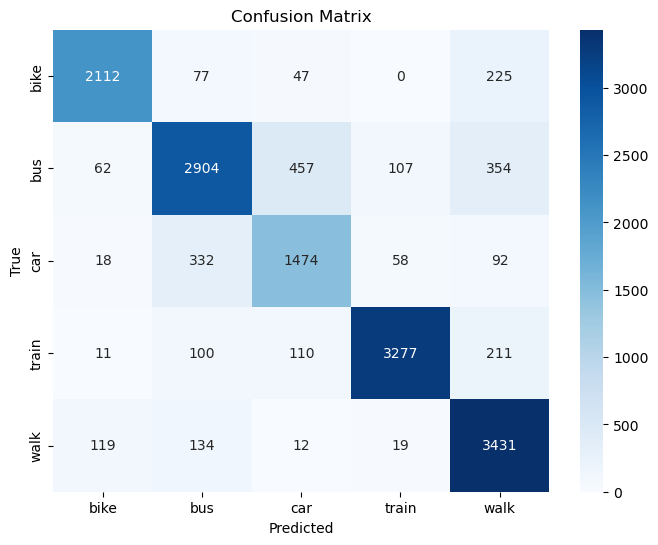

In [28]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Training History')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [37]:
X_train.shape

(58643, 100, 3)

In [38]:
y_train.shape

(58643, 5)